In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import glob

## Load model logs
Merge several models into a single logfile for plotting

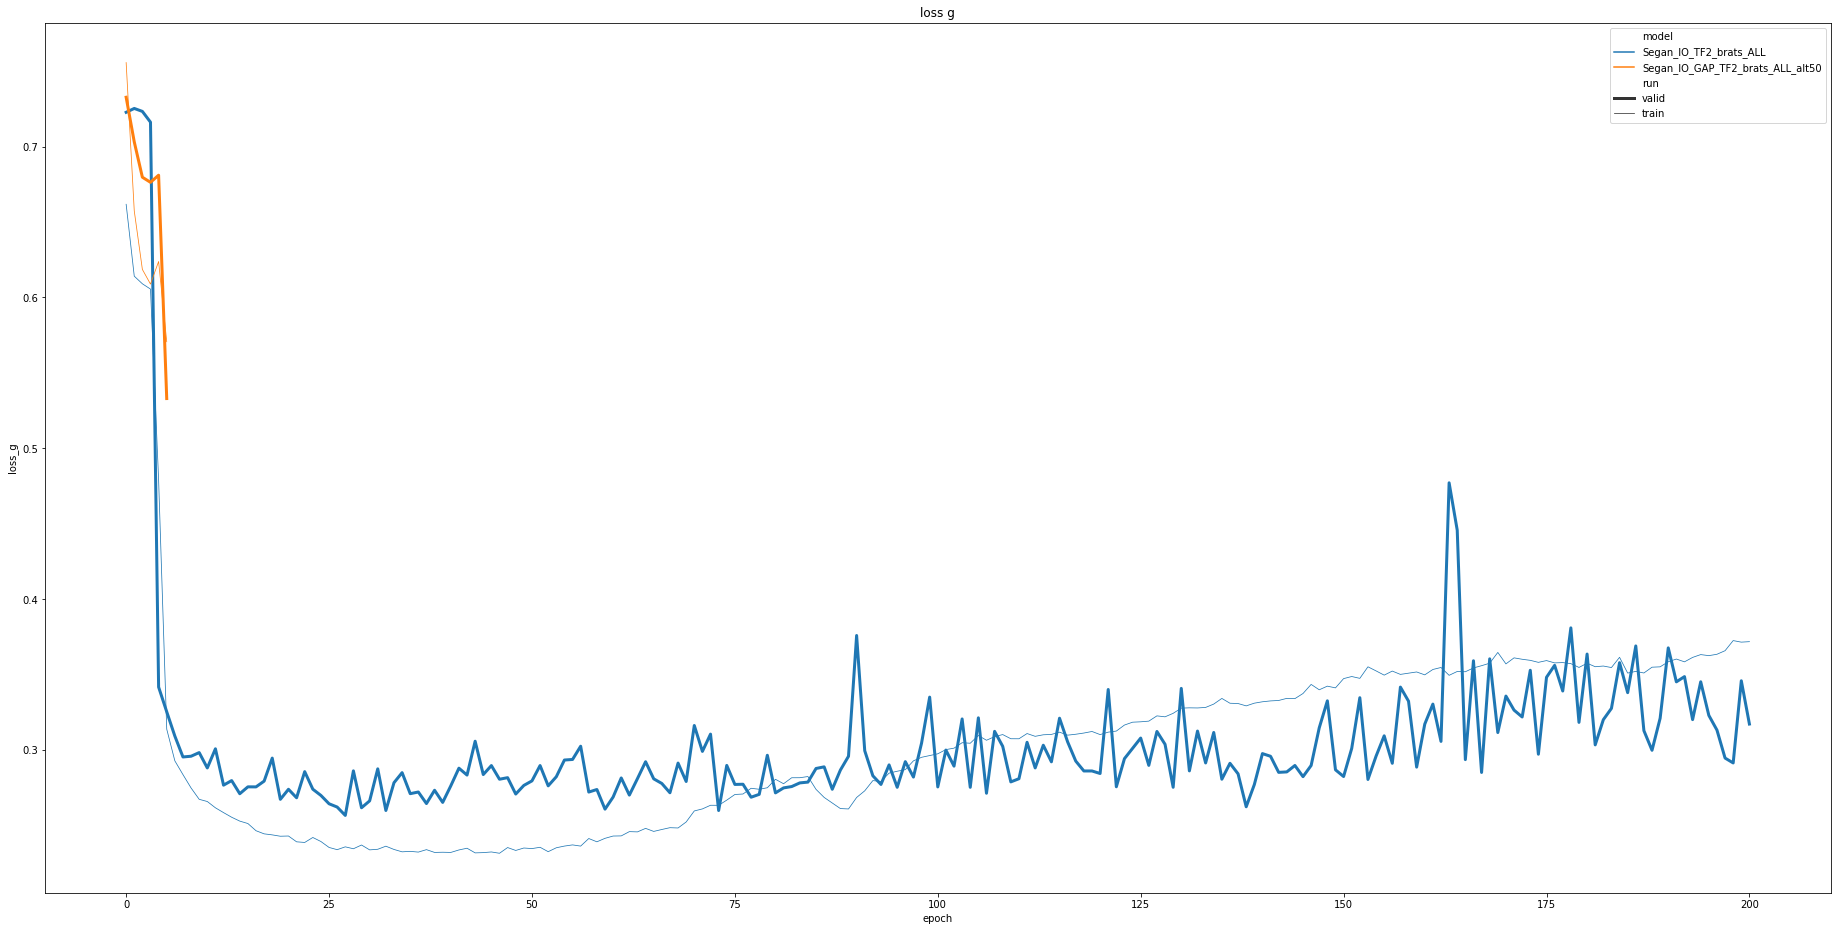

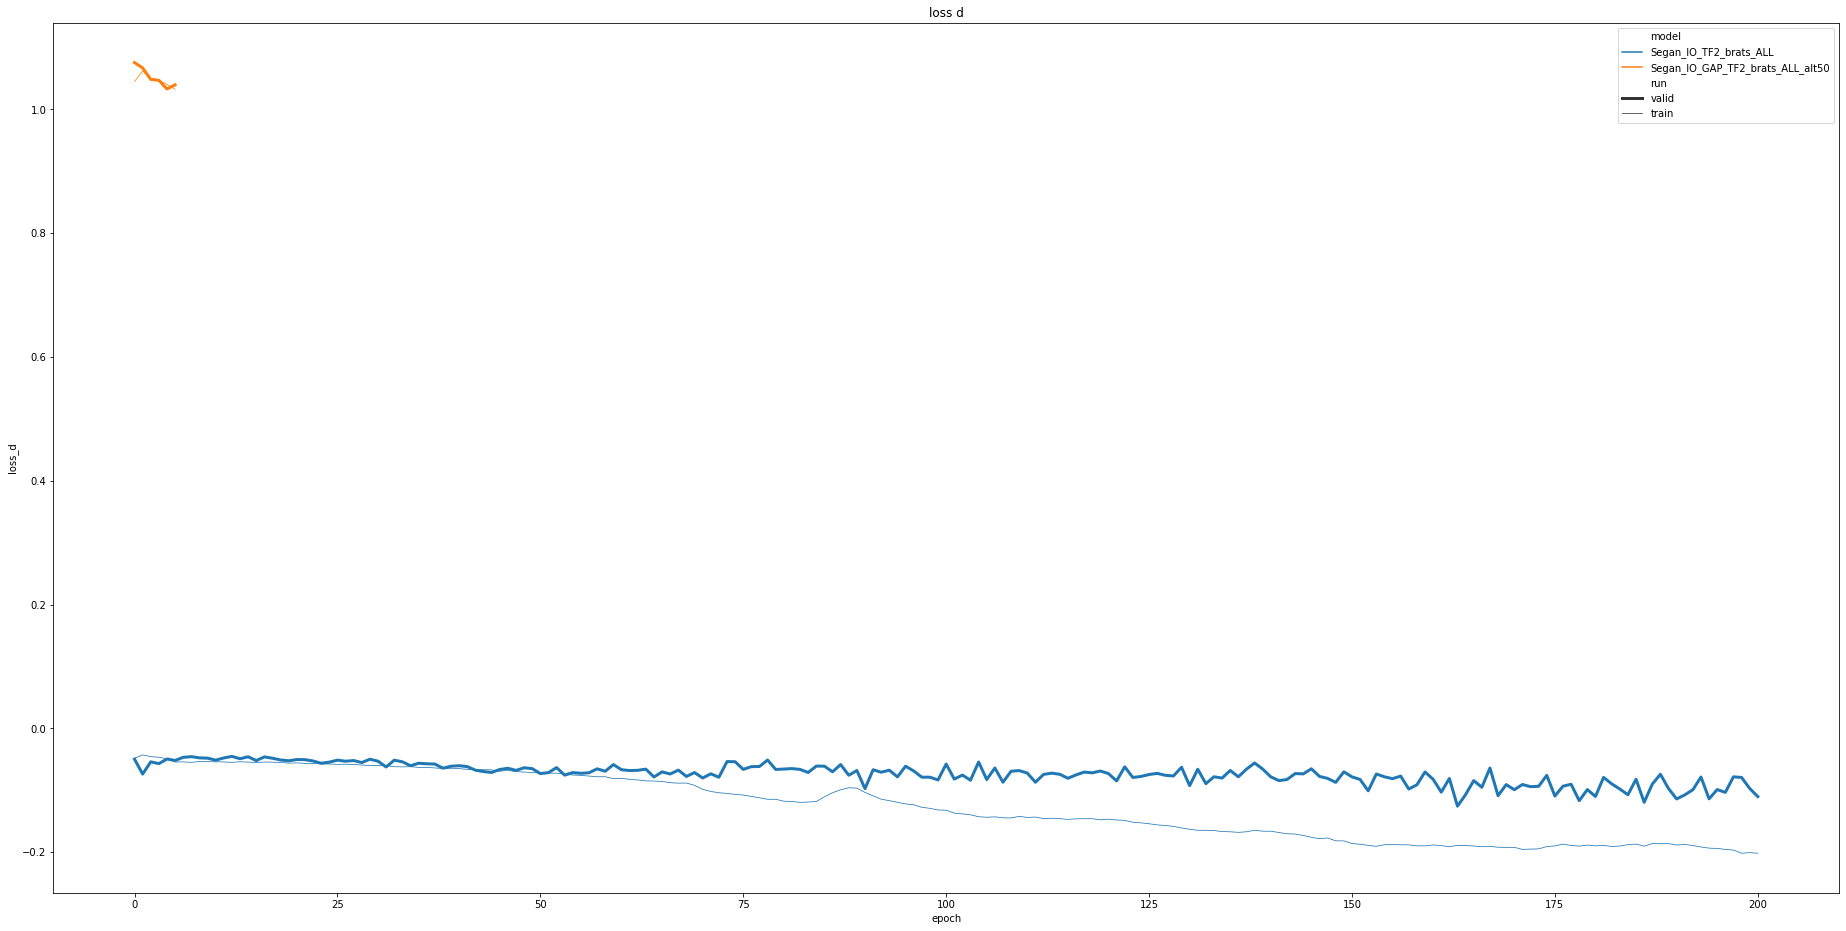

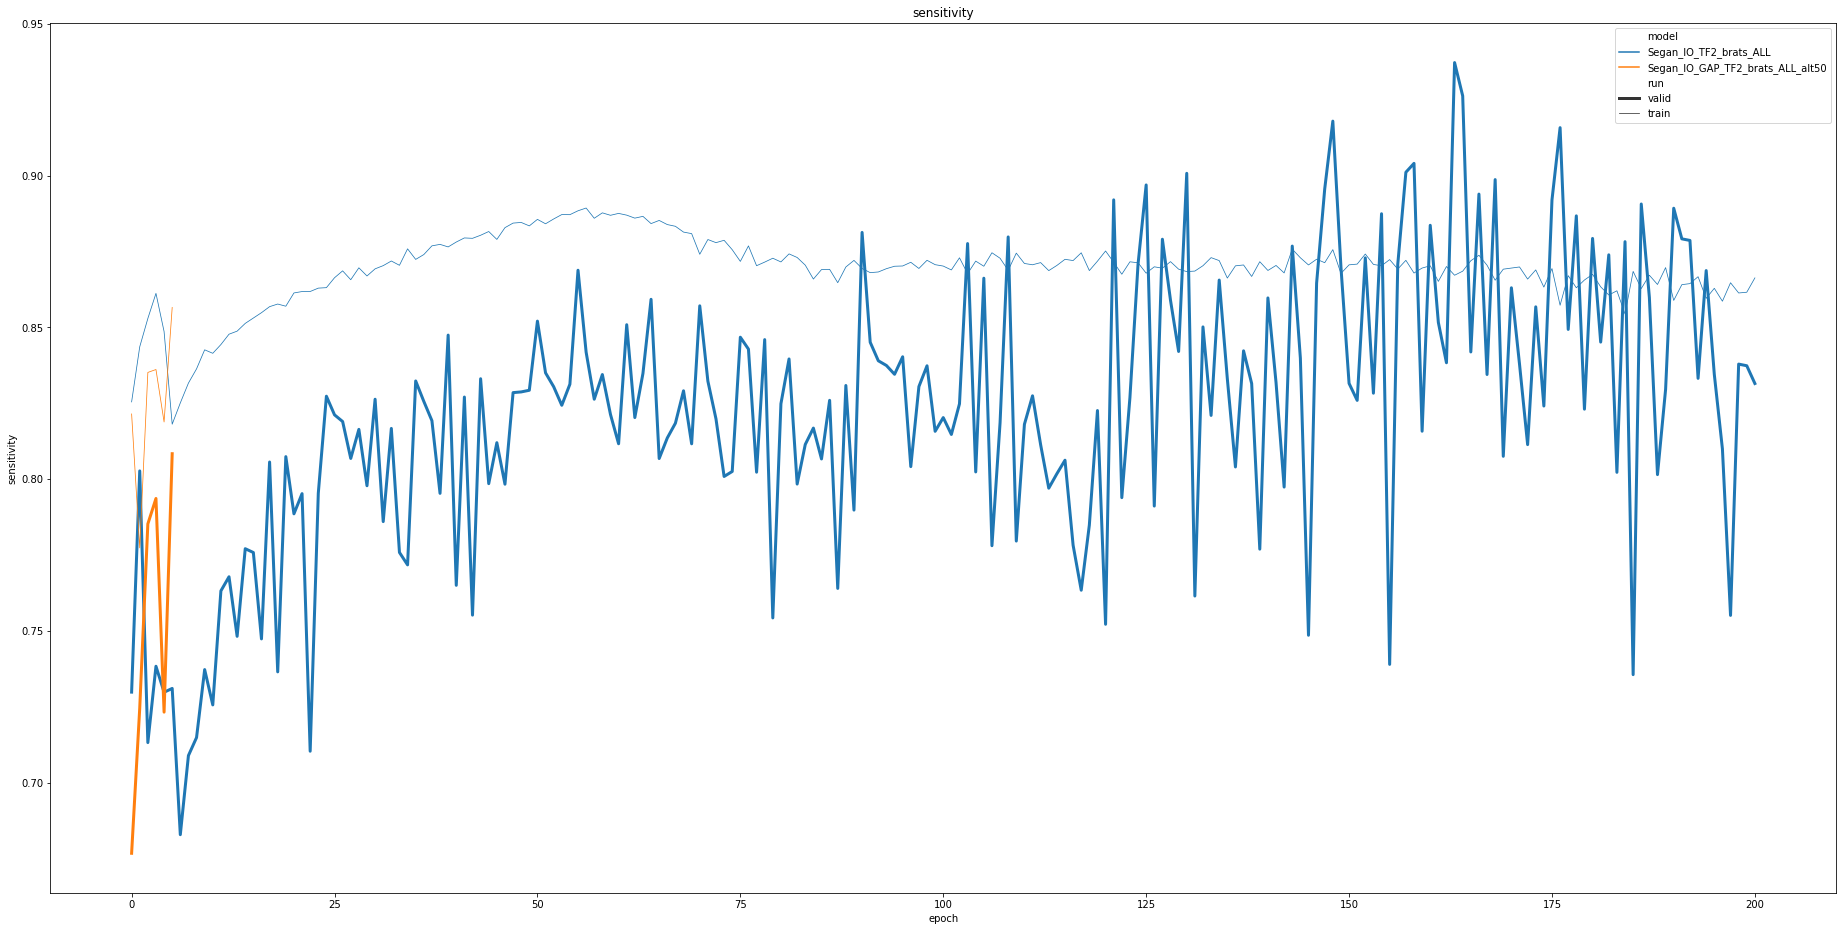

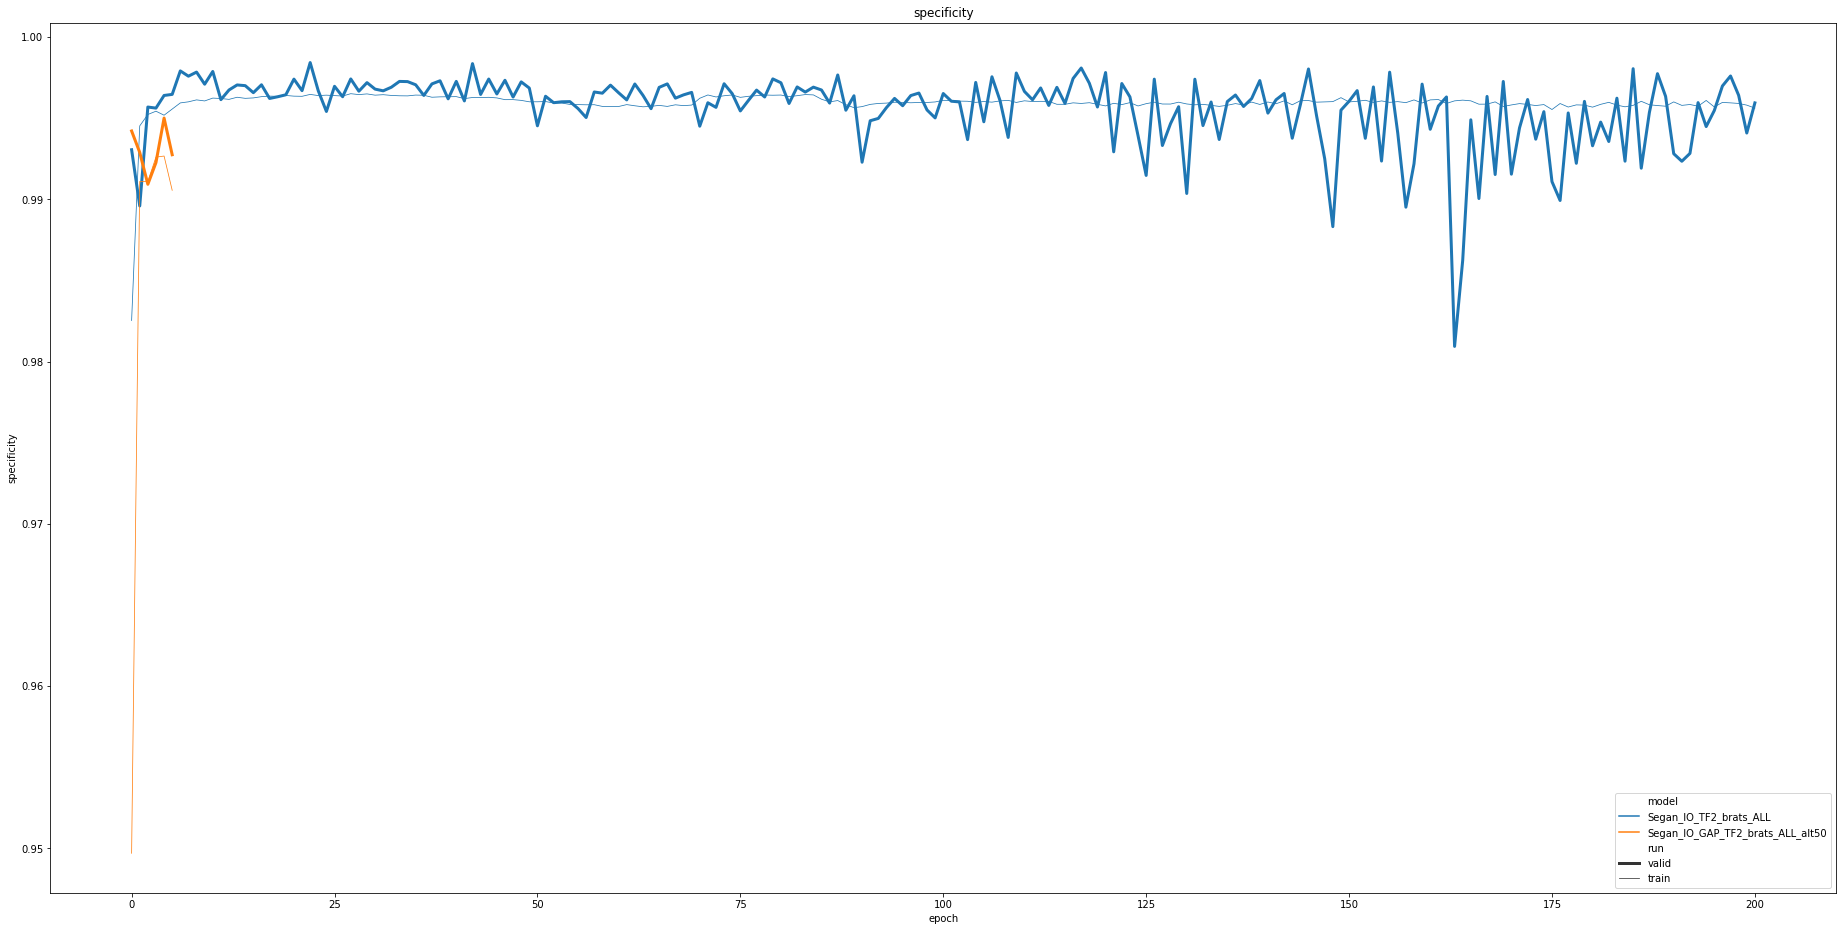

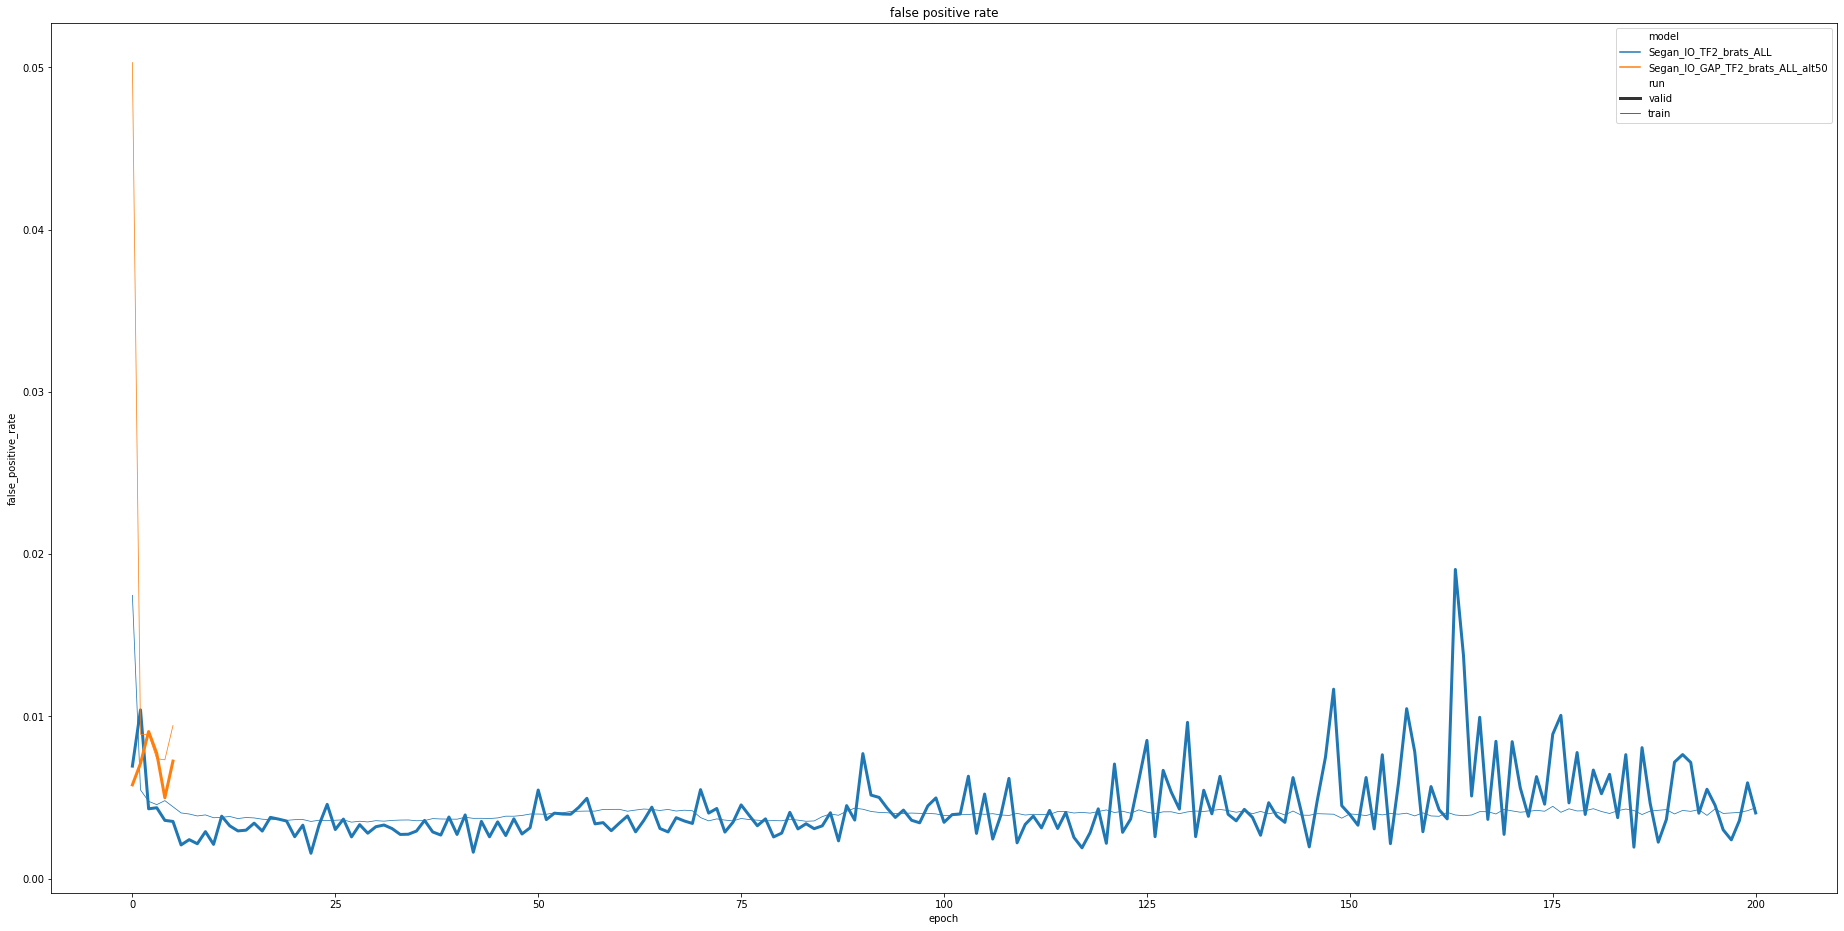

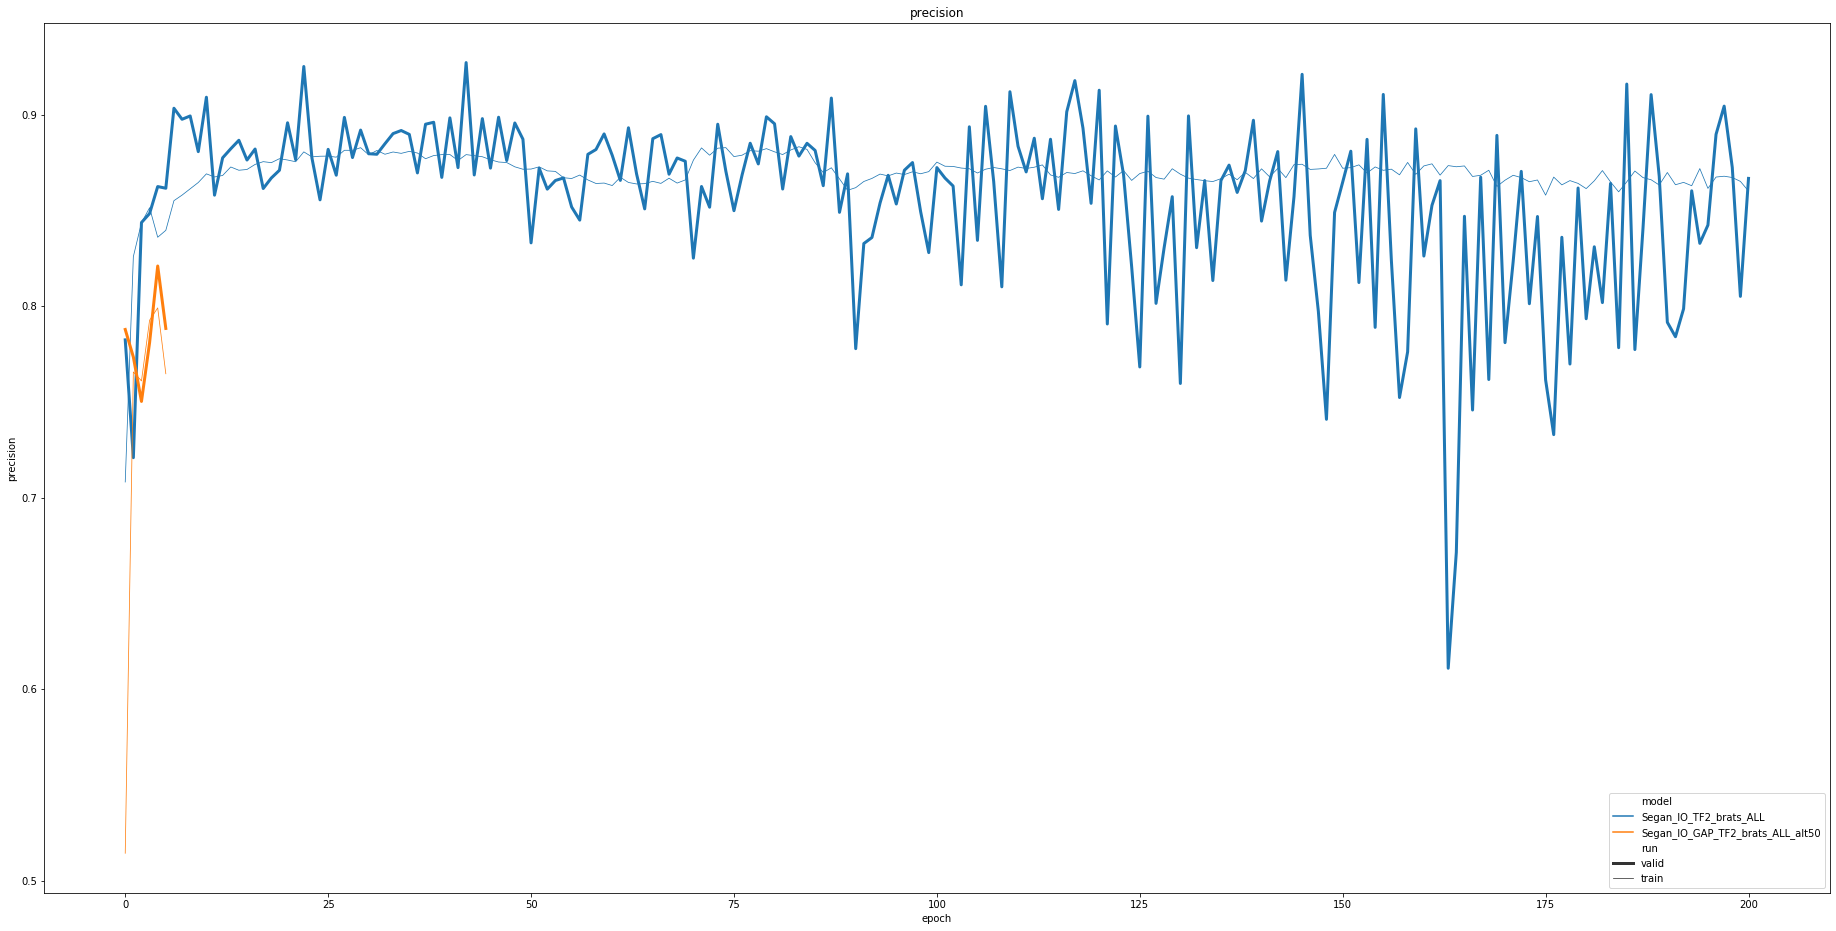

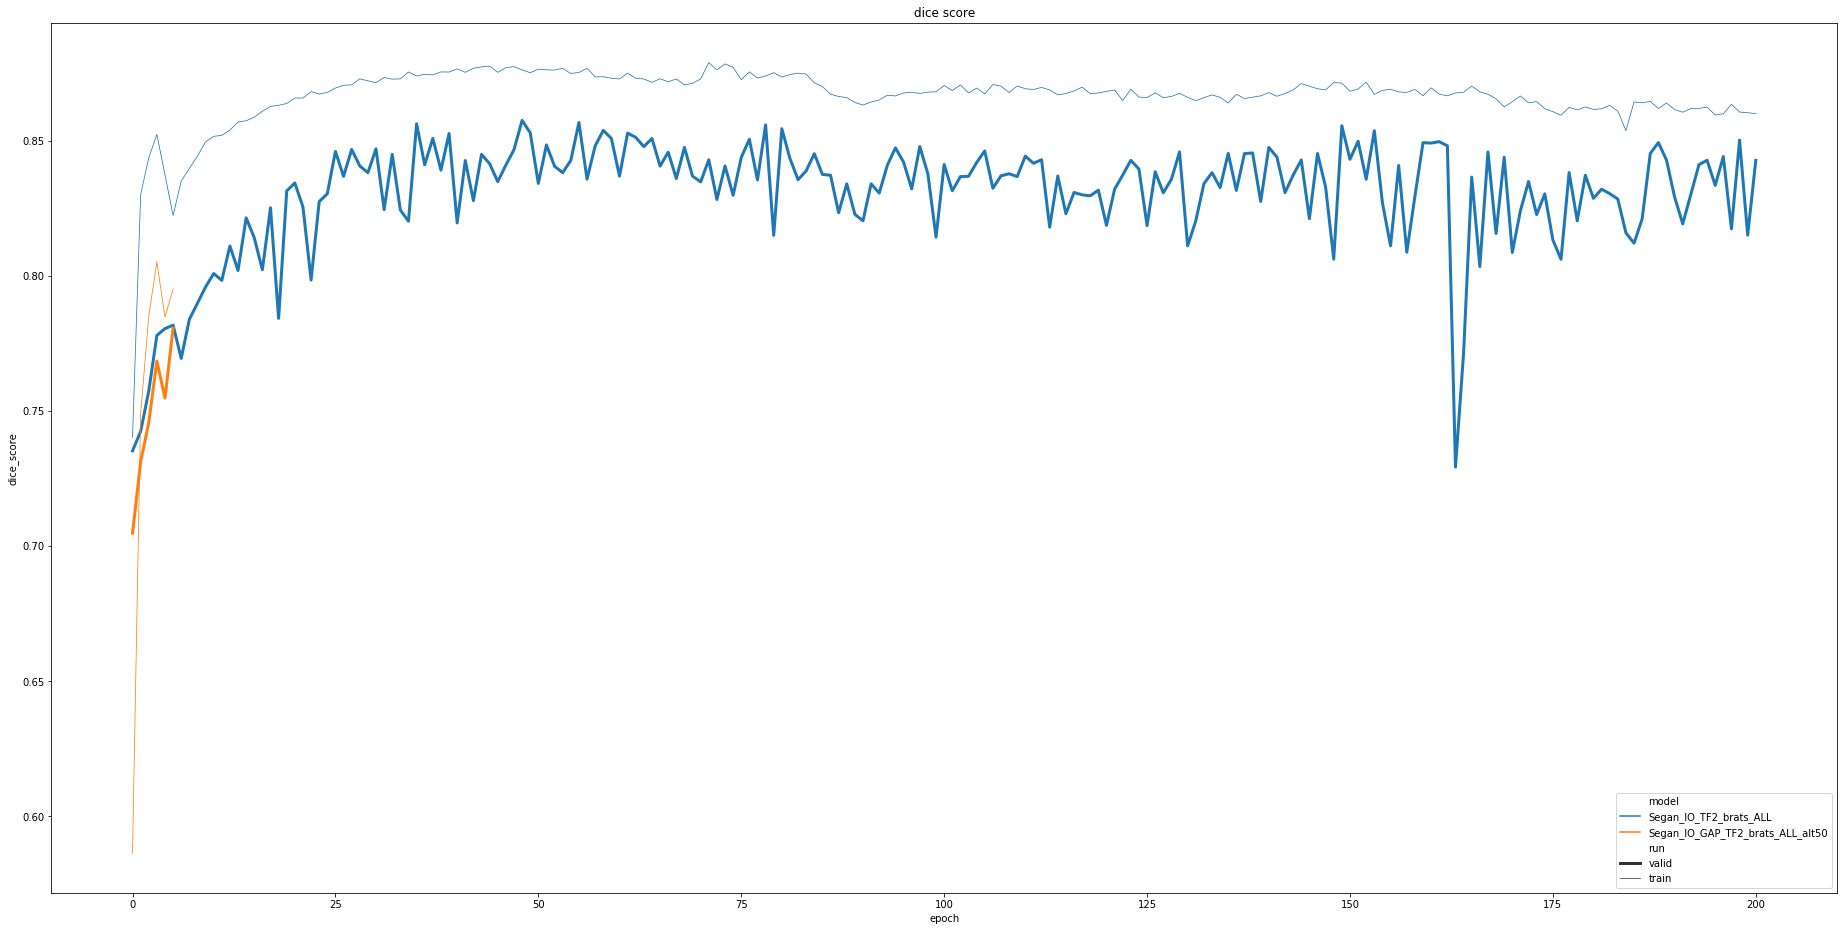

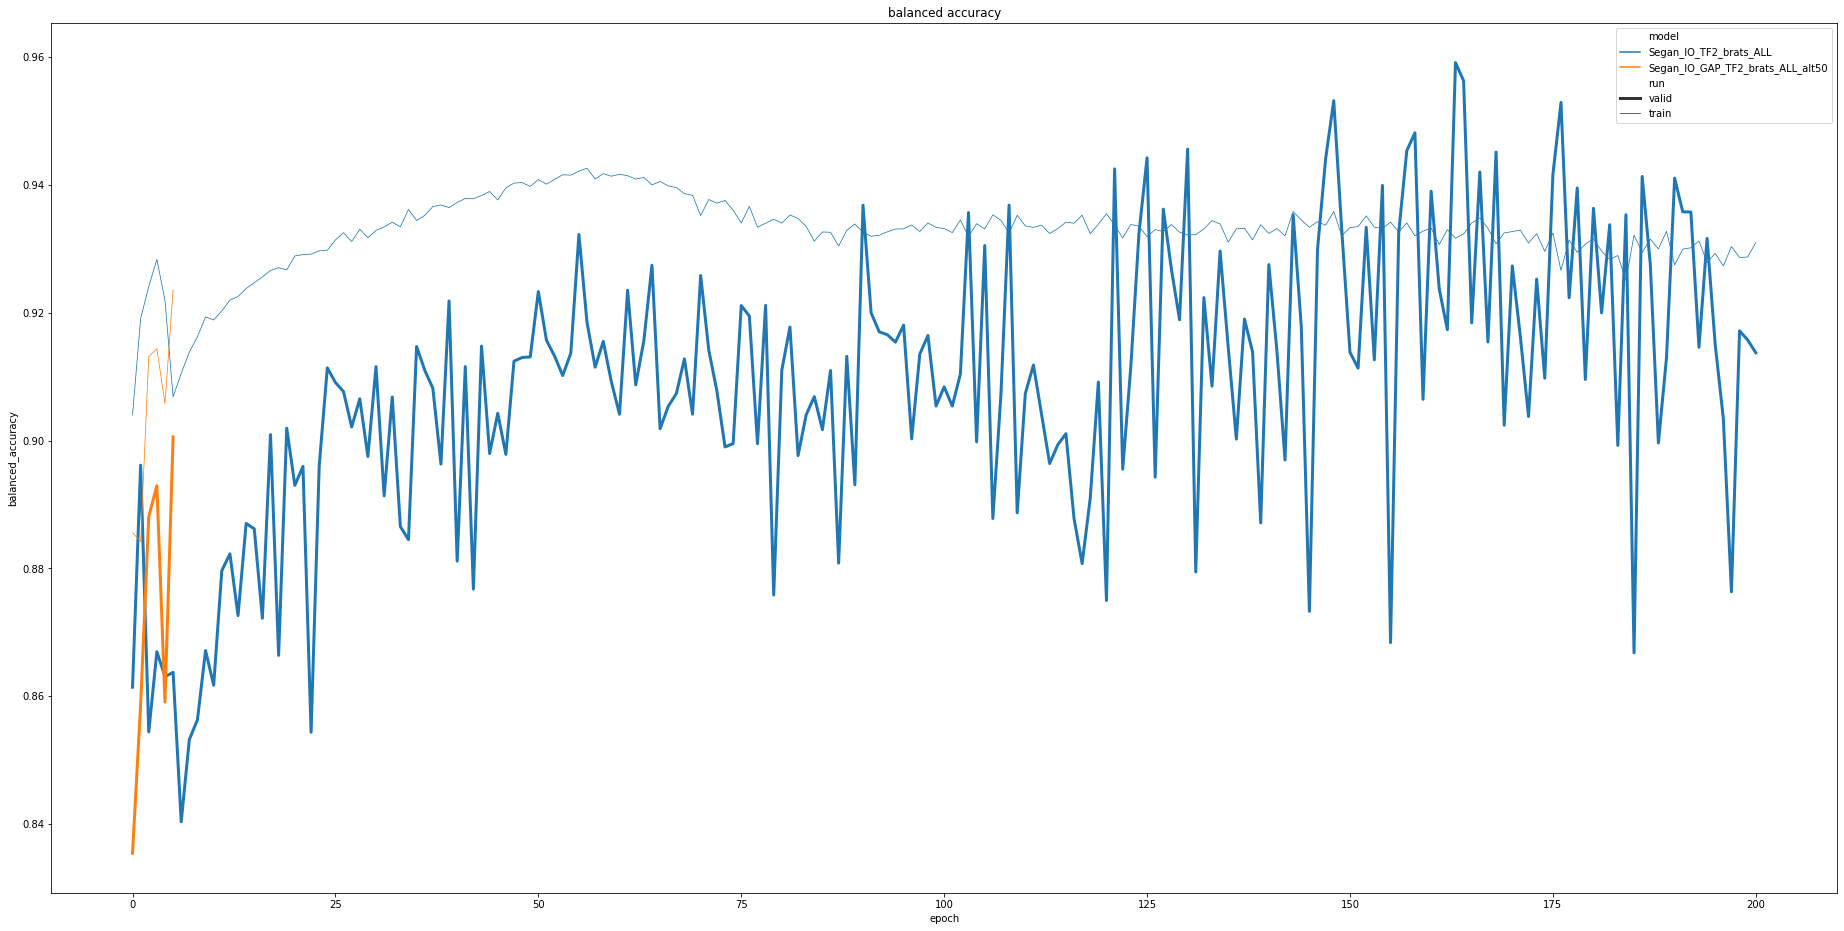

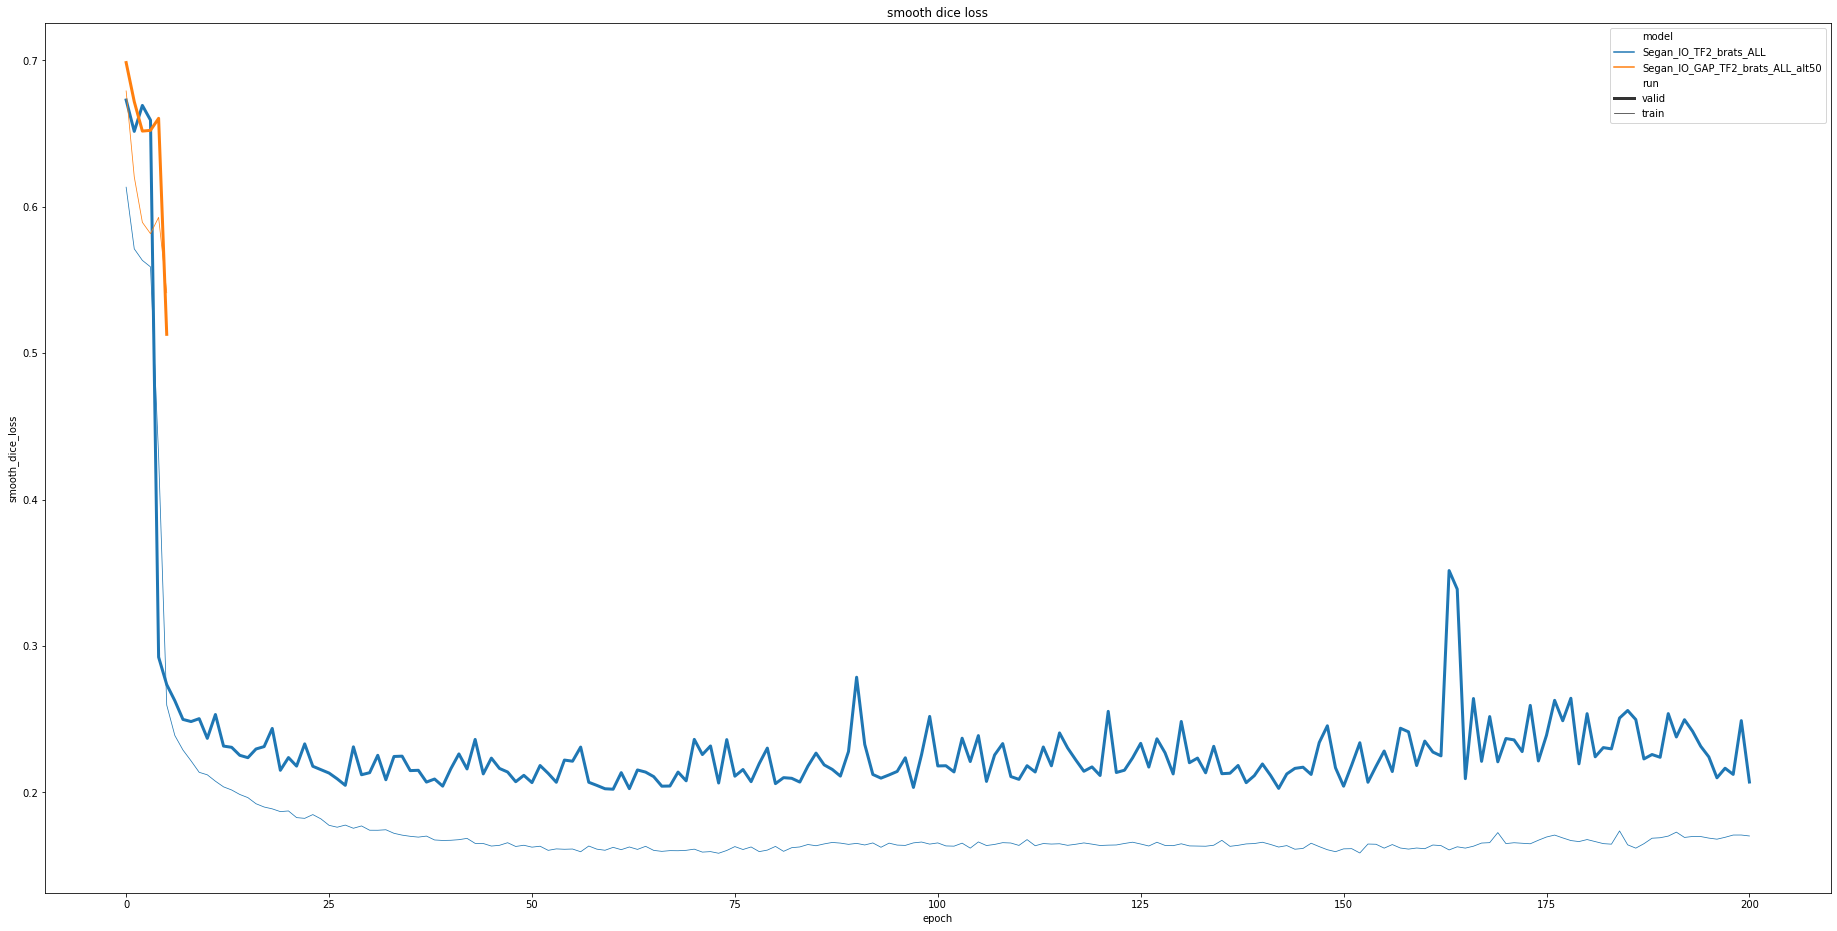

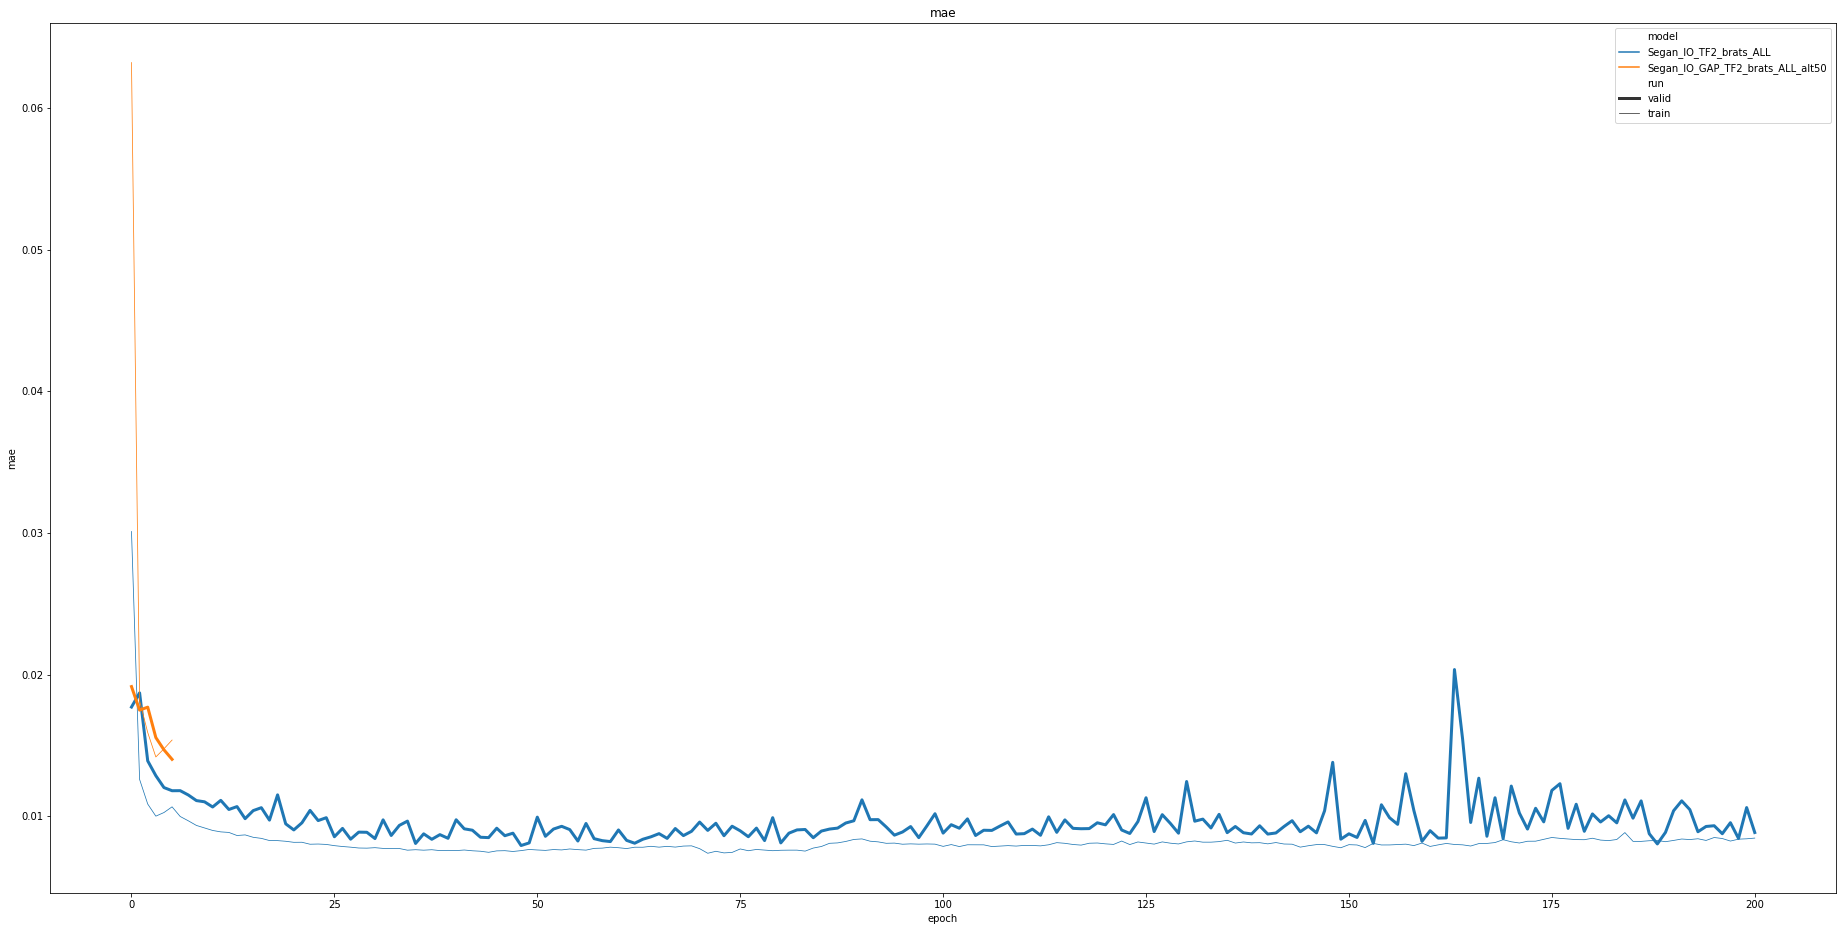

In [4]:
# A: Show training loss for SegAN_IO base models
models = ['Segan_IO_TF2_brats_ALL', 'Segan_IO_GAP_TF2_brats_ALL_alt50']
#models = ['Custom_MultiFOV_bd2decide_on_T1_alt500', 'Custom_MultiFOV_D6_bd2decide_on_T1_alt50', 'Custom_MultiFOV_G6_bd2decide_on_T1_alt50']
#models = ['Segan_IO_TF2_brats_on_T1', 'Segan_IO_TF2_brats_on_T1c', 'Segan_IO_TF2_brats_on_T2', 'Segan_IO_brats_on_FLAIR']
#models = ['Segan_IO_TF2_bd2decide_on_T2', 'Segan_IO_TF2_bd2decide_on_T2_alt500']
# B: First run of transfer experiments
#models = ['Segan_IO_TF2_brats_on_T1', 'Transfer_Brats_Flair_to_T1', 'Transfer_Brats_Flair_to_T1_freeze_all']
#models = ['Segan_IO_TF2_bd2decide_on_T2', 'transfer_bratsT2_to_B2D-freeze_all']
LIMIT_EPOCH_TO = 200
runs = ['valid', 'train']
dfs = []

for mod in models:
    for run in runs:
        df = pd.read_csv('models/{}/log_{}.csv'.format(mod, run), index_col=0)
        df['model'] = mod
        df['run'] = run
        df = df.reset_index()
        dfs += [df]
log = pd.concat(dfs)
log = log[log['epoch']<=LIMIT_EPOCH_TO]

def plot(stat):
    plt.figure(figsize=(32, 16))
    plt.title(stat.replace('_', ' '))
    return sb.lineplot(data=log, x='epoch', y=stat, size='run', hue='model')

stats = [c for c in log.columns if c not in ['datetime', 'epoch', 'run', 'model']]
for s in stats:
    plot(s)

### Print best model for each run in ./models/*/

In [6]:
def print_best_performances(metric='dice_score'):
    for csv in glob.glob('models/*/log_valid.csv'):
        modelname = csv.split('/')[1]
        pdcsv = pd.read_csv(csv)
        best = pdcsv.loc[pdcsv['dice_score'].idxmax()]
        print("Model: {} - Best {} {} at epoch {}".format(modelname, metric, best['dice_score'], best['epoch']))
print_best_performances()

Model: Custom_MultiFOV_brats_on_FLAIR - Best dice_score 0.8269016742706299 at epoch 159
Model: Segan_IO_TF2_brats_on_T2 - Best dice_score 0.7209994792938232 at epoch 182
Model: Segan_IO_TF2_brats_on_T1c - Best dice_score 0.6112254858016968 at epoch 1011
Model: Segan_IO_TF2_bd2decide_on_T2 - Best dice_score 0.164668008685112 at epoch 3
Model: Segan_IO_TF2_bd2decide_on_T2_alt500 - Best dice_score 0.15607543289661407 at epoch 5
Model: Segan_IO_TF2_brats_on_T1_alt50 - Best dice_score 0.6210064888000488 at epoch 1426
Model: Segan_IO_TF2_bd2decide_on_T1 - Best dice_score 0.20200926065444946 at epoch 2
Model: Segan_IO_TF2_brats_on_T1 - Best dice_score 0.5665786266326904 at epoch 861
Model: Segan_IO_TF2_brats_on_FLAIR - Best dice_score 0.8281170129776001 at epoch 168
Model: Transfer_Brats_Flair_to_T1 - Best dice_score 0.5223069190979004 at epoch 273
Model: Transfer_Brats_Flair_to_T1_freeze_all - Best dice_score 0.6193402409553528 at epoch 1122
Model: transfer_bratsT2_to_B2D-freeze_all - Best d